In [7]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

#from scipy.fftpack import fft
#import random
#import librosa

sys_values = False
if (sys_values):
    import sys
    print("sys.executable: ", sys.executable)
    print("-----------------")
    !type python
    print("-----------------")
    from pprint import pprint as p
    p(sys.path)

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_40769/2544696115.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load(audio_path, sr=None)


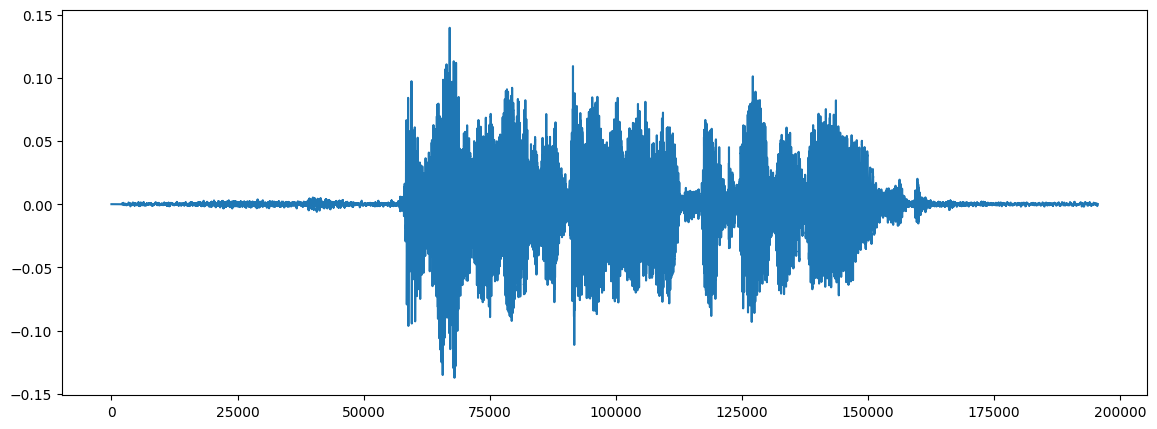

In [94]:
# Specify which audio file to look at, and where in the waveform
# the good signal begins ... the start times were initially set
# to zero and then adjusted later by viewing the waveforms.

choice = 5

if (choice == 1):
    audio_path = './LowE.mp4'
    start_time = 2.13
elif (choice == 2):
    audio_path = './MidE.mp4'
    start_time = 2.38
elif (choice == 3):
    audio_path = './HighE.mp4'
    start_time = 1.88
elif (choice == 4):
    audio_path = './sample1.mp4'
    start_time = 1.05
elif (choice == 5):
    audio_path = './sample2.mp4'
    start_time = 1.05

# Get the waveform using librosa
x, sr = librosa.load(audio_path, sr=None)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(x)

/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_40769/181222112.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y1, sr1 = librosa.load(audio_path, offset=start_time,duration=myduration,sr=None)
/var/folders/5f/rgfnh64x7k1bfzln9qq9n76r0000gr/T/ipykernel_40769/181222112.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y2, sr2 = librosa.load(audio_path, offset=start_time+myoffset,duration=myduration,sr=None)


(0.0, 500.0)

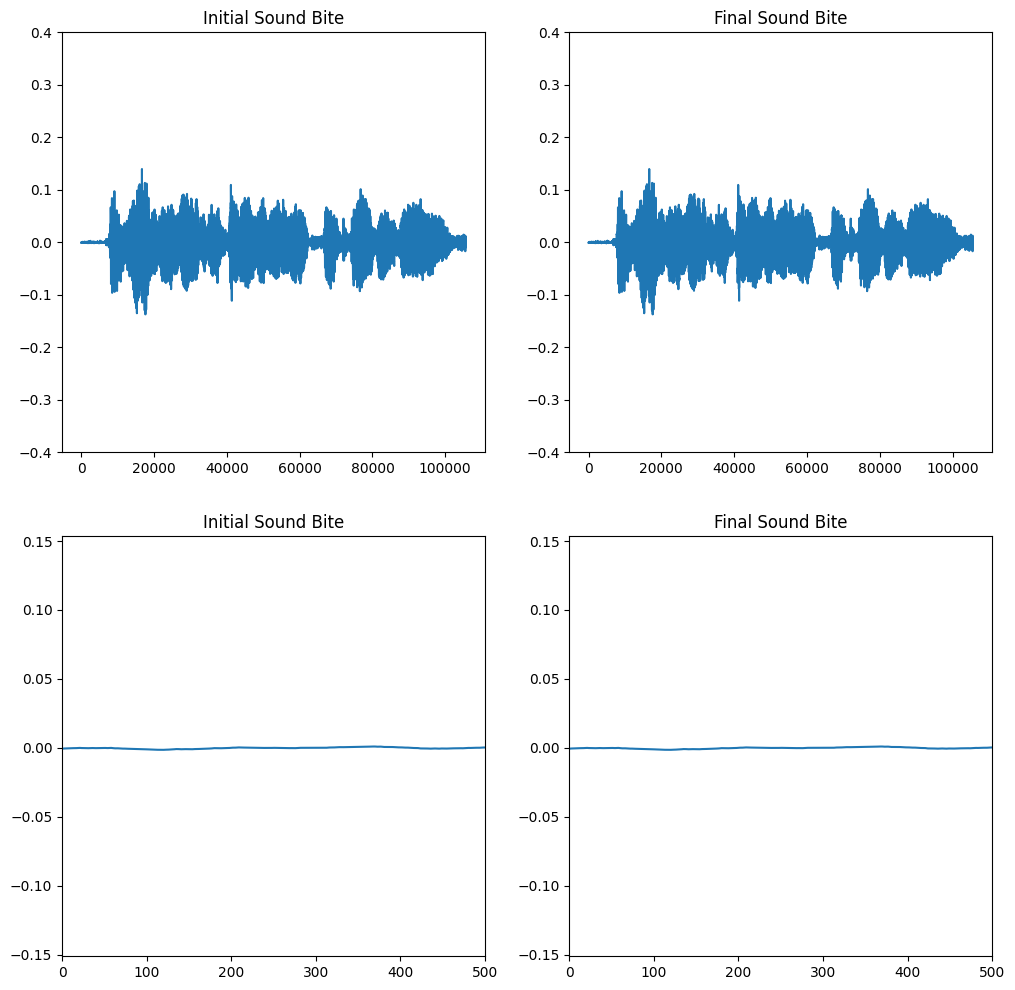

In [95]:
# Grab specific portions of the waveform, by specifying an offset
# and duration.  y1 is at the very beginning, and y2 is at the
# very end.

if (choice <=3):
    myduration = 0.160
    myoffset = 3.20 - 2*0.320
else:
    myduration = 2.2
    myoffset = 0.0

y1, sr1 = librosa.load(audio_path, offset=start_time,duration=myduration,sr=None)
y2, sr2 = librosa.load(audio_path, offset=start_time+myoffset,duration=myduration,sr=None)

# Plot things!
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

ax[0][0].plot(y1)
ax[0][1].plot(y2)
ax[0][0].set_ylim(-0.4,0.4)
ax[0][1].set_ylim(-0.4,0.4)
ax[0][0].set_title("Initial Sound Bite")
ax[0][1].set_title("Final Sound Bite")
ax[1][0].plot(y1)
ax[1][1].plot(y2)
ax[1][0].set_title("Initial Sound Bite")
ax[1][1].set_title("Final Sound Bite")
ax[1][0].set_xlim(0,500)
ax[1][1].set_xlim(0,500)

In [96]:
# Calculate FFT of the early sound bite (sp1) and
# the time spacing (dt1), in seconds, and the number
# of data points (nframes) for this sound bite.
sp1 = np.fft.fft(y1)
dt1 = 1.0/sr1
nframes = len(y1)

# Create arrays to hold the time axis values (t1), 
# the frequency axis values (f1), and the power spectrum
# values (power1)
f1 = []
t1 = []
power1 = []
for i in range(int(len(y1)/2)):
    t1.append(i*dt1)
    f1.append(i/(nframes*dt1))
    power1.append(sp1.real[i]**2+sp1.imag[i]**2)
t1 = np.array(t1)
f1 = np.array(f1)
power1 = np.array(power1)

# Now, do the same process for the second sound bite (y2)
sp2 = np.fft.fft(y2)
dt2 = 1.0/sr2
nframes = len(y2)

f2 = []
t2 = []
power2 = []
for i in range(int(len(y2)/2)):
    t2.append(i*dt2)
    f2.append(i/(nframes*dt2))
    power2.append(sp2.real[i]**2+sp2.imag[i]**2)
t2 = np.array(t2)
f2 = np.array(f2)
power2 = np.array(power2)

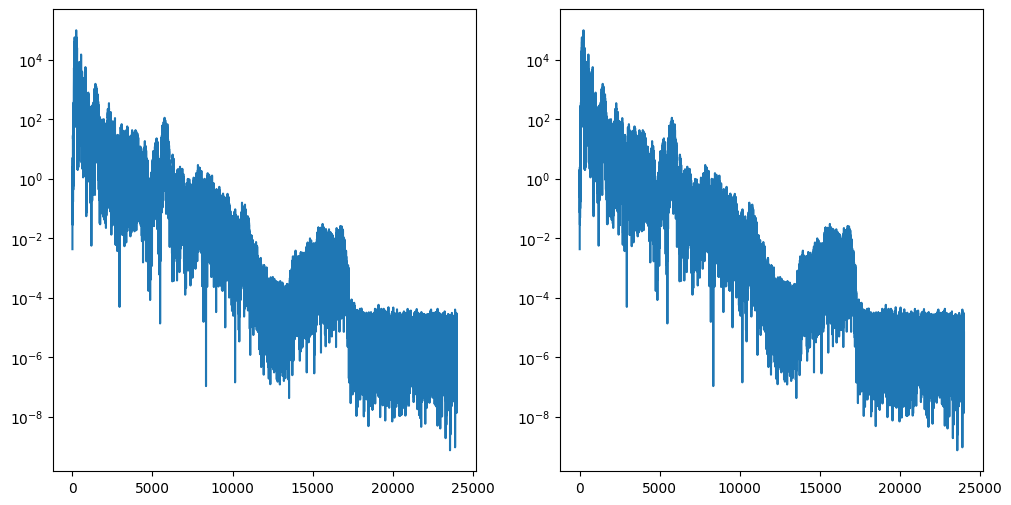

In [97]:
# Plot things!
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].plot(f1, power1)
ax[1].plot(f2, power2)
ax[0].set_yscale("log")
ax[1].set_yscale("log")

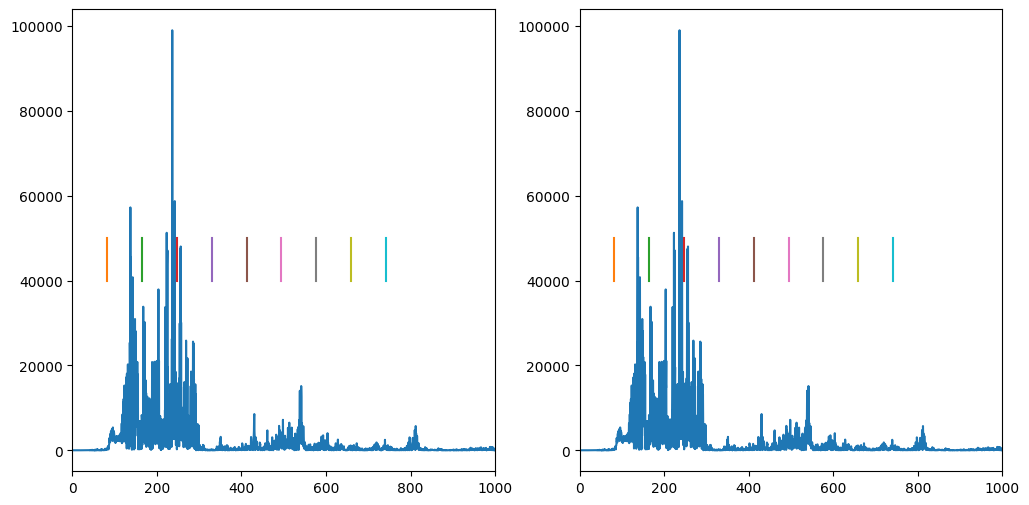

In [98]:
# Plot things over a more reasonable frequency range,
# and also plot some vertical lines at the fundamental
# frequency of the expected note, along with the harmonics
# i.e. multiples of the fundamental frequency

fig2, axs2 = plt.subplots(nrows=1, ncols=2, figsize=(12,6)) 
#axs2[0].set_yscale("log")
#axs2[1].set_yscale("log")

axs2[0].plot(f1,power1)
axs2[0].set_xlim(0,1000)
axs2[1].plot(f2,power2)
axs2[1].set_xlim(0,1000)

if (choice == 1):
    e_nominal = 82.407
elif (choice == 2):
    e_nominal = 164.814
elif (choice == 3):
    e_nominal = 329.628
    
efreq = [e_nominal*i for i in range(1,10)]

for i in range(len(efreq)):
    vliney = []
    vlinex = []
    vlinex.append(efreq[i])
    vliney.append(50000)
    vlinex.append(efreq[i])
    vliney.append(40000)
    axs2[0].plot(vlinex,vliney)
    axs2[1].plot(vlinex,vliney)
